In [1]:
#!/usr/bin/env python3
import sys
srcdir = "/project/mchaisso_100/cmb-16/tsungyul/work/vntr/danbing-tk/script/"
sys.path.insert(0, srcdir)

In [2]:
import numpy as np
import pandas as pd
import vntrutils as vu
import utils
# import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
# %load_ext autoreload
# %autoreload 2

In [3]:
from collections import defaultdict
import pickle
# import networkx as nx
# import pygraphviz
# import collections
import gc
# import glob
# import warnings
import statsmodels.api as sm
# from statsmodels.stats.multitest import fdrcorrection as fdr
# from scipy import stats
# import gzip
# from sklearn.decomposition import PCA
# from scipy.stats import chi2
# import re
# import json

In [4]:
matplotlib.rc('font', size=7)
matplotlib.rc('axes', titlesize=7)
matplotlib.rc('xtick', labelsize=5)
matplotlib.rc('ytick', labelsize=5)

In [44]:
def test():
    with open("/project/mchaisso_100/cmb-17/vntr_genotyping/rpgg2_k21_84k/hgsvc/clinic/cdbg/v1/ki_tr.ccki_tr.pickle", 'rb') as f:
        ki_tr, ccki_tr = pickle.load(f)
    return ki_tr, ccki_tr
ki_tr, ccki_tr = test()

In [45]:
def test():
    with open("/project/mchaisso_100/cmb-17/vntr_genotyping/rpgg2_k21_84k/hgsvc/clinic/cdbg/v1/ks.ccks.cck_ns.ki_map.pickle", 'rb') as f:
        ks, ccks, cck_ns, ki_map = pickle.load(f)
    return ks, ccks, cck_ns, ki_map
ks, ccks, cck_ns, ki_map = test()

In [46]:
def get_ki(tri):
    si = ki_tr[tri-1] if tri else 0
    ei = ki_tr[tri]
    return si, ei
def get_ccki(tri):
    si = ccki_tr[tri-1] if tri else 0
    ei = ccki_tr[tri]
    return si, ei

In [47]:
def test():
    with open("/project/mchaisso_100/cmb-17/vntr_genotyping/rpgg2_k21_84k/hgsvc/clinic/bias/invariant_kmer/ikmer.ikstats.pickle", 'rb') as f:
        ikmer, ikstats = pickle.load(f)
    return ikmer, ikstats
ikmer, ikstats = test()

# Evaluate using HGSVC samples

## Bias correction for HGSVC genotypes

In [42]:
cov = np.loadtxt("/project/mchaisso_100/cmb-17/vntr_genotyping/analysis/read_depth/ctrl/HGSVC.cov.tsv", usecols=1)

In [48]:
# if bias == 0, set it as nan
def test():
    ng = cov.size
    ntr = len(ki_tr)
    
    NB = 1
    BS = ng // NB
    bias = np.zeros([ng, ntr])
    for i in range(NB):
        BS_ = BS if i != NB-1 else ng - BS*i
        i0s = i * BS
        i0e = i0s + BS_
        print(f"batch {i}: loading gt", end="")
        with open(f"/project/mchaisso_100/cmb-17/vntr_genotyping/rpgg2_k21_84k/hgsvc/clinic/gt_pickle/gt.{i}.pickle", 'rb') as f:
            gt = pickle.load(f)
        agt = gt / cov[i0s:i0e,None]
        for tri in range(ntr):
            if tri % 1000 == 0:
                print(".", end="")
            si, ei = get_ki(tri)
            inv = np.nonzero(ikmer[si:ei])[0] + si
            if inv.size:
                bias[i0s:i0e, tri] = np.mean(agt[:,inv] / ikstats[0,inv], axis=1)
        print()
    bias[bias==0] = np.nan
    bias /= np.nanmean(bias, axis=0)
    n0 = np.sum(~np.isfinite(bias))
    print(f"{n0} cells of nan's")
    return bias

bias = test()

batch 0: loading gt.................................................................................
87241 cells of nan's


/tmp/SLURM_10309788/ipykernel_45418/1360468483.py:26: RuntimeWarning: Mean of empty slice
  bias /= np.nanmean(bias, axis=0)


In [49]:
def test():
    with open("/project/mchaisso_100/cmb-17/vntr_genotyping/rpgg2_k21_84k/hgsvc/clinic/bias/invariant_kmer/bias.v2.pickle", 'wb') as f:
        pickle.dump(bias, f)
# test()

In [5]:
def test():
    with open("/project/mchaisso_100/cmb-17/vntr_genotyping/rpgg2_k21_84k/hgsvc/clinic/bias/invariant_kmer/bias.v2.pickle", 'rb') as f:
        return pickle.load(f)
bias = test()

In [6]:
np.savetxt("/project/mchaisso_100/cmb-17/vntr_genotyping/rpgg2_k21_84k/hgsvc/clinic/bias/invariant_kmer/bias.v2.32x80518", sep="\t")

,0,1,2,3,4,5,6,7,8,9,...,80508,80509,80510,80511,80512,80513,80514,80515,80516,80517
0,0.946634,0.806191,0.966339,0.879785,0.793313,NaN,0.867151,0.890542,NaN,0.984685,...,0.775244,0.592075,0.627190,0.544390,0.708696,0.650834,0.794075,0.641655,0.718774,0.529117
1,0.894851,0.640925,0.872983,0.446888,0.800978,NaN,0.903928,0.696959,NaN,0.856213,...,0.815906,1.103228,1.128145,1.419351,1.605209,1.287951,1.413721,1.326857,1.235806,1.039810
2,1.065511,1.163663,1.515921,1.674834,1.468575,NaN,1.441117,1.482173,NaN,1.112064,...,0.827491,0.852891,0.526682,0.798415,0.711963,0.742682,0.564240,0.602878,0.828596,0.481310
3,1.429489,1.637495,1.947311,1.890337,1.828650,NaN,2.101925,1.864036,NaN,1.641204,...,1.244299,1.460653,1.310442,1.575493,1.271547,1.276385,1.442697,1.368658,1.296530,1.302890
4,0.877647,0.702746,1.091383,1.044810,1.151135,NaN,1.032710,1.222426,NaN,1.051962,...,0.784098,0.571555,0.746970,0.844836,0.877315,0.736758,0.482742,0.588076,0.606635,1.159650
5,0.960552,0.948652,0.904003,1.057525,1.056267,NaN,1.082580,0.795865,NaN,0.941853,...,1.116991,1.216342,1.217685,1.069673,1.175020,1.003108,0.693851,0.879723,1.065834,0.736429
6,1.086915,0.938529,0.956535,1.165235,0.850412,NaN,0.751903,0.769312,NaN,0.885416,...,1.181090,1.281136,1.622192,1.229808,1.342472,1.149401,1.615978,0.961523,1.082997,1.517979
7,1.045944,1.011471,1.057099,0.939669,0.648413,NaN,0.992574,0.625782,NaN,1.282558,...,1.340936,1.259531,1.355995,1.112480,1.120182,1.240092,1.193330,1.337697,1.339855,1.326860
8,1.381791,0.725174,1.042070,0.951478,1.122840,NaN,0.981264,1.003227,NaN,0.827342,...,0.663947,0.841652,0.470880,0.748671,0.667330,0.656431,1.072796,0.640597,0.781053,0.617745
9,1.066822,1.073056,1.028330,1.076540,1.697445,NaN,0.917617,1.445374,NaN,0.903808,...,0.717603,0.779827,0.657278,0.737452,0.708516,0.780251,1.059518,0.721169,0.611661,0.656518


In [135]:
def test():
    with open("/project/mchaisso_100/cmb-17/vntr_genotyping/rpgg2_k21_84k/hgsvc/clinic/cdbg/v1/ks.ccks.cck_ns.ki_map.pickle", 'rb') as f:
        ks, ccks, cck_ns, ki_map = pickle.load(f)
    return ks, ccks, cck_ns, ki_map
ks, ccks, cck_ns, ki_map = test()

In [144]:
ks = np.array(ks)

## motif batch-$r^2$

In [88]:
def test():
    omap1 = pd.read_csv("/project/mchaisso_100/cmb-17/vntr_genotyping/rpgg2_k21_84k/hgsvc/clinic/output/OrthoMap.v2.tsv", sep="\t", header=None, na_values=".").values
    
    gs = np.loadtxt("/project/mchaisso_100/cmb-17/vntr_genotyping/rpgg2_k21_84k/hgsvc/clinic/LOO/input/genome.LOO.bam.tsv", usecols=0, dtype=object)
    gs1 = np.loadtxt("/project/mchaisso_100/cmb-16/tsungyul/work/vntr/hapdb/config/genomes.HGSVC2.txt", dtype=object)
    gm1 = np.isin(gs1, gs)
    hm1 = np.repeat(gm1, 2)
    ng = gs.size
    nh = 2*ng
    ntr = omap1.shape[0]
    
    omap = omap1[:,hm1]
    trgmask = np.ones([ntr, ng], dtype=bool)
    i1s = np.arange(0, nh, 2)
    trgmask &= np.isfinite(omap[:,i1s]) # hap0 in not missing in TR annotation
    trgmask &= np.isfinite(omap[:,i1s+1]) # hap1 in not missing in TR annotation
    return trgmask
    
trgmask = test()

In [91]:
np.savetxt("/project/mchaisso_100/cmb-17/vntr_genotyping/rpgg2_k21_84k/hgsvc/clinic/bias/invariant_kmer/input2/tr.genome.mask.txt", trgmask, fmt="%s", delimiter="\t")

In [99]:
pd.read_csv("/project/mchaisso_100/cmb-17/vntr_genotyping/rpgg2_k21_84k/hgsvc/clinic/bias/invariant_kmer/input2/tr.genome.mask.txt", sep="\t", header=None)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,True,True,True,True,False,True,True,True,True,False,...,False,False,True,True,True,True,True,True,True,True
1,True,True,True,True,False,True,True,True,True,False,...,False,False,True,True,False,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,False,False,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,False,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,False,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80513,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
80514,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
80515,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
80516,True,True,False,True,False,True,True,True,True,False,...,True,True,True,True,True,False,False,True,True,True


In [50]:
def test():
    with open("/project/mchaisso_100/cmb-17/vntr_genotyping/rpgg2_k21_84k/hgsvc/clinic/gt_pickle/pbcgt.pickle", 'rb') as f:
        pbcgt = pickle.load(f)
    return pbcgt
pbcgt = test()

In [51]:
def test():
    with open("/project/mchaisso_100/cmb-17/vntr_genotyping/rpgg2_k21_84k/hgsvc/clinic/gt_pickle/acgt.pickle", 'rb') as f:
        acgt = pickle.load(f)
    return acgt
acgt = test()

In [100]:
# compute `r2.{bi}.pickle` using /project/mchaisso_100/cmb-17/vntr_genotyping/rpgg2_k21_84k/hgsvc/clinic/bias/invariant_kmer/log2/batch_r2.sh
def test():
    ng, ntr = bias.shape
    nk = ccki_tr[-1]
    NB = 8
    BS = ntr // NB
    R2 = np.full(nk, np.nan)
    R2a = np.full(nk, np.nan)
    for bi in range(NB):
        with open(f"/project/mchaisso_100/cmb-17/vntr_genotyping/rpgg2_k21_84k/hgsvc/clinic/bias/invariant_kmer/output2/r2.{bi}.pickle", 'rb') as f:
            r2, r2a = pickle.load(f)
        tri0 = bi*BS
        tri1 = (bi+1)*BS-1 if bi != NB-1 else ntr-1
        si = ccki_tr[tri0-1] if tri0 else 0
        ei = ccki_tr[tri1]
        R2[si:ei] = r2[si:ei]
        R2a[si:ei] = r2a[si:ei]
    return R2, R2a
R2_all_mtf, R2a_all_mtf = test()

In [101]:
def test():
    with open(f"/project/mchaisso_100/cmb-17/vntr_genotyping/rpgg2_k21_84k/hgsvc/clinic/bias/invariant_kmer/output2/R2_all_mtf.R2a_all_mtf.pickle", 'wb') as f:
        pickle.dump((R2_all_mtf, R2a_all_mtf), f)
# test()

In [19]:
def test():
    with open(f"/project/mchaisso_100/cmb-17/vntr_genotyping/rpgg2_k21_84k/hgsvc/clinic/bias/invariant_kmer/output2/R2_all_mtf.R2a_all_mtf.pickle", 'rb') as f:
        return pickle.load(f)
R2_all_mtf, R2a_all_mtf = test()

In [102]:
trfilter = np.all(pd.read_csv("/project/mchaisso_100/cmb-17/vntr_genotyping/rpgg2_k21_84k/hgsvc/clinic/analysis/80518_loci.alu.mismap_1.r2.v2.filter.tsv", sep="\t", index_col=0).values[:,3:], axis=1)

In [103]:
motiffilter = np.all(np.loadtxt("/project/mchaisso_100/cmb-17/vntr_genotyping/rpgg2_k21_84k/hgsvc/clinic/analysis/mape.invariant.flank.alu.mismap_1.r2.v2.filter.tsv.gz", dtype=int, usecols=[3,4,5,6,7,8,9], skiprows=1).astype(bool), axis=1)

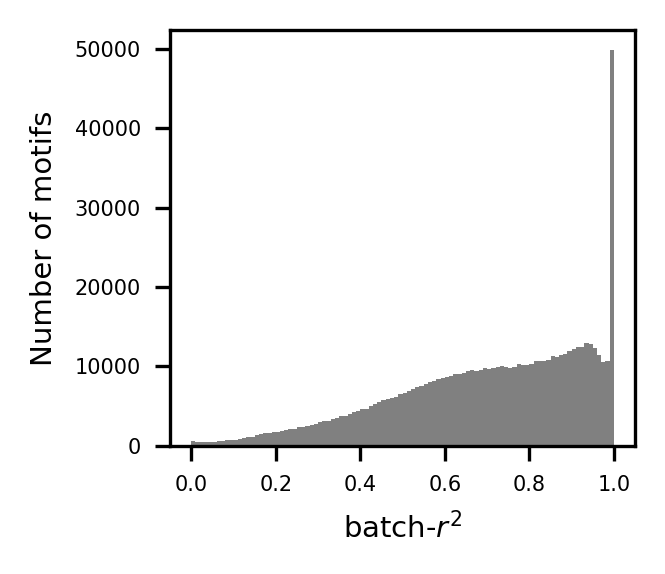

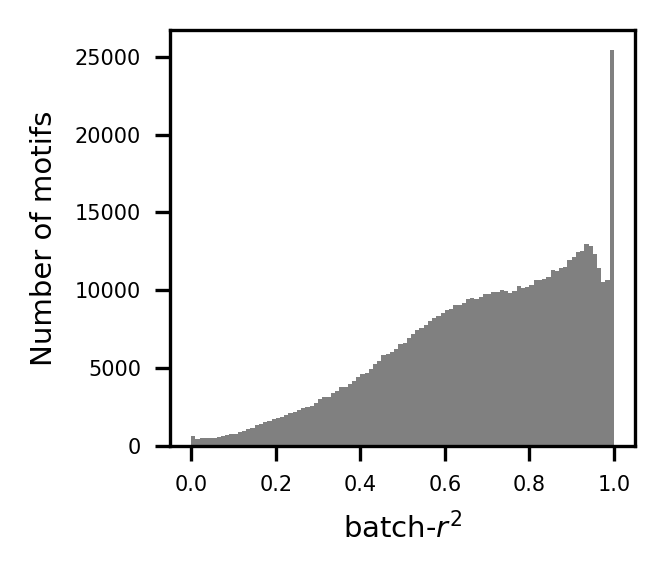

In [104]:
# Peak at 1 due to private motifs observed in only 1 genome.
# Large number of motifs with r2 close to 1 but not exactly due to noise for 0-dosage samples.
def test():
    xs = R2a_all_mtf[motiffilter]
    utils.hist(xs, "batch-$r^2$", "Number of motifs", bins=100, dpi=300)
    xs = xs[xs < 1]
    utils.hist(xs, "batch-$r^2$", "Number of motifs", bins=100, dpi=300)
test()

/tmp/SLURM_10309788/ipykernel_45418/1532454853.py:11: RuntimeWarning: Mean of empty slice
  R2a[tri] = np.nanmean(R2a_all_mtf[si:ei][m0])
/tmp/SLURM_10309788/ipykernel_45418/1532454853.py:10: RuntimeWarning: Mean of empty slice
  R2[tri] = np.nanmean(R2_all_mtf[si:ei][m0])


33,935/39,125 (86.7%) loci evaluated
0.642 -> 0.715


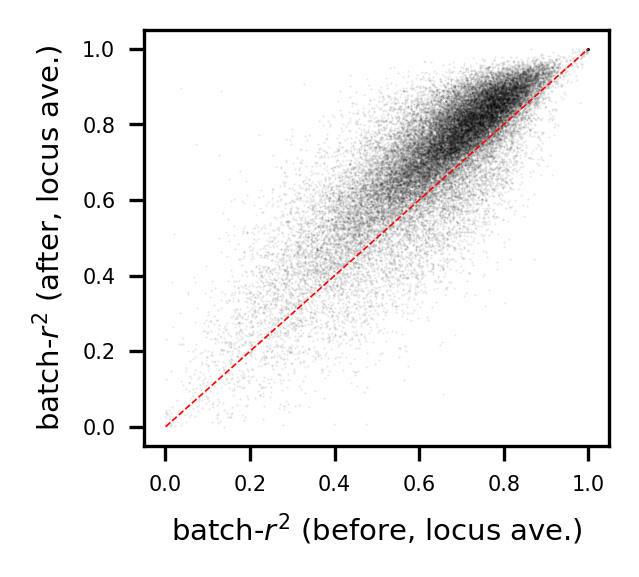

In [105]:
def test():
    ng, ntr = bias.shape
    R2 = np.full(ntr, np.nan)
    R2a = np.full(ntr, np.nan)
    for tri, good in enumerate(trfilter):
        if not good: continue
        si = ccki_tr[tri-1] if tri else 0
        ei = ccki_tr[tri]
        m0 = motiffilter[si:ei]
        R2[tri] = np.nanmean(R2_all_mtf[si:ei][m0])
        R2a[tri] = np.nanmean(R2a_all_mtf[si:ei][m0])
    
    n0 = np.sum(np.isfinite(R2a))
    n1 = np.sum(trfilter)
    print(f"{n0:,}/{n1:,} ({n0/n1:.1%}) loci evaluated")
    print(f"{np.nanmean(R2):.3f} -> {np.nanmean(R2a):.3f}")
    xl = [np.nanmin(R2), np.nanmax(R2)]
    plt.figure(dpi=300, figsize=(2,1.8))
    plt.plot(R2, R2a, '.k', mew=0, markersize=1, alpha=0.1)
    plt.plot(xl, xl, '--r', lw=0.4)
    plt.xlabel("batch-$r^2$ (before, locus ave.)")
    plt.ylabel("batch-$r^2$ (after, locus ave.)")
    plt.show(); plt.close()
    return R2, R2a
R2_all_loci, R2a_all_loci = test()

668,961/769,616 (86.9%) motifs evaluated
0.656 -> 0.701


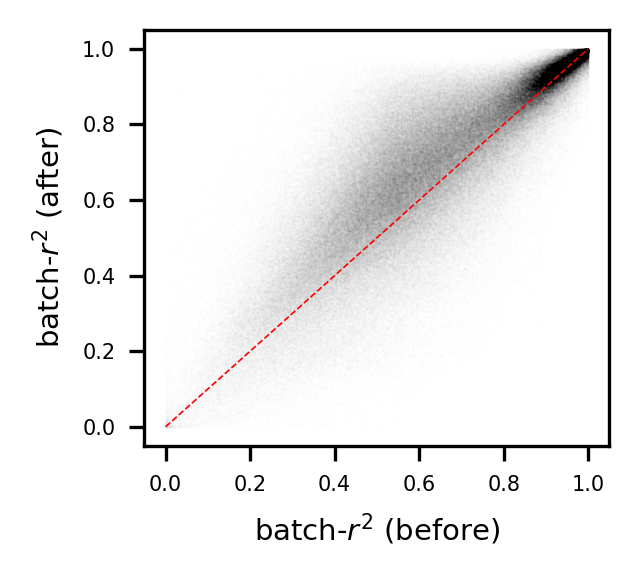

In [106]:
def test():
    R2, R2a = R2_all_mtf[motiffilter], R2a_all_mtf[motiffilter]
    n0 = np.sum(np.isfinite(R2a))
    n1 = R2.size
    print(f"{n0:,}/{n1:,} ({n0/n1:.1%}) motifs evaluated")
    print(f"{np.nanmean(R2):.3f} -> {np.nanmean(R2a):.3f}")
    xl = [np.nanmin(R2), np.nanmax(R2)]
    plt.figure(dpi=300, figsize=(2,1.8))
    plt.plot(R2, R2a, '.k', mew=0, markersize=1, alpha=0.002)
    plt.plot(xl, xl, '--r', lw=0.4)
    plt.xlabel("batch-$r^2$ (before)")
    plt.ylabel("batch-$r^2$ (after)")
    plt.show(); plt.close()
test()

## length batch-$r^2$

In [62]:
def test():
    trhlens0 = pd.read_csv("/project/mchaisso_100/cmb-17/vntr_genotyping/rpgg2_k21_84k/hgsvc/clinic/analysis/trlen.tsv", sep="\t", na_values="nan", index_col=0).iloc[:,6:].values.astype(float)
    ntr = trhlens0.shape[0]
    gs = np.loadtxt("/project/mchaisso_100/cmb-17/vntr_genotyping/rpgg2_k21_84k/hgsvc/clinic/LOO/input/genome.LOO.bam.tsv", usecols=0, dtype=object)
    gs0 = np.loadtxt("/project/mchaisso_100/cmb-16/tsungyul/work/vntr/hapdb/config/genomes.HGSVC2.txt", dtype=object)
    gm0 = np.isin(gs0,gs)
    hm0 = np.repeat(gm0, 2)
    ng = gs.size
    trhlens = trhlens0[:,hm0]
    trlens = np.full([ntr, ng], np.nan)
    for gi in range(ng):
        trlens[:,gi] = np.mean(trhlens[:,2*gi:2*gi+2], axis=1)
    return trlens
trlens = test()

In [107]:
pd.DataFrame(trlens)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,81.0,81.0,81.0,81.0,NaN,81.0,81.0,81.5,81.0,NaN,...,NaN,NaN,81.0,81.0,81.0,81.0,81.0,81.0,81.0,81.0
1,150.5,150.5,150.5,102.0,NaN,102.0,102.0,101.5,150.5,NaN,...,NaN,NaN,102.0,102.0,NaN,101.5,101.5,102.0,102.0,102.0
2,3836.5,3836.5,3836.5,3959.0,3959.0,3854.0,3959.0,3959.0,3836.5,3959.0,...,3959.0,3959.0,3959.0,3959.0,NaN,NaN,3836.0,3854.0,3959.0,3959.0
3,330.0,330.0,330.0,322.0,309.0,330.0,322.0,336.0,330.0,309.0,...,309.0,321.5,309.0,309.0,NaN,322.0,330.0,363.0,309.0,309.0
4,467.5,467.5,443.0,467.5,443.0,443.0,467.5,443.0,467.5,443.0,...,443.0,443.0,443.0,443.0,NaN,NaN,467.5,590.0,443.0,443.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80513,3644.0,3643.5,3638.0,3644.5,3644.0,3645.5,3641.0,3644.0,3646.0,3645.0,...,3641.0,3644.0,3639.5,3636.5,3644.5,3643.0,3645.0,3645.5,3645.5,3643.5
80514,136.0,136.0,136.0,136.0,136.0,136.0,136.0,136.0,136.0,136.0,...,136.0,136.0,136.0,136.0,136.0,136.0,136.0,136.0,136.0,136.0
80515,503.0,502.5,502.0,502.0,502.0,502.0,502.0,502.0,502.0,502.0,...,502.0,502.0,502.0,503.0,502.0,502.0,502.0,502.0,502.0,502.0
80516,150.0,150.0,NaN,150.0,NaN,150.0,150.0,150.0,150.0,NaN,...,150.0,150.0,150.0,150.0,150.0,NaN,NaN,150.0,150.0,150.0


In [26]:
def test():
    with open("/project/mchaisso_100/cmb-17/vntr_genotyping/rpgg2_k21_84k/hgsvc/clinic/gt_pickle/gt.0.pickle", 'rb') as f:
        ilgt = pickle.load(f).astype(float)
    return ilgt / np.loadtxt("/project/mchaisso_100/cmb-17/vntr_genotyping/analysis/read_depth/ctrl/HGSVC.cov.tsv", usecols=1)[:,None]
ilagt = test()

In [66]:
def test():
    trdsg = np.zeros_like(trlens)
    for tri, good in enumerate(trfilter):
        if not good: continue
        si, ei = get_ki(tri)
        trdsg[tri] = np.sum(ilagt[:,si:ei], axis=1)
    return trdsg
trdsg = test()

In [108]:
pd.DataFrame(trdsg)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2672.849386,2341.673687,4259.954623,5451.099426,3071.061697,2445.465394,2614.698867,3017.230130,2941.307975,2912.709220,...,2168.097448,2807.271095,3043.406593,2512.714241,2592.747096,2841.340269,2357.729941,2189.329092,2540.519408,2695.838548
3,231.780509,132.350463,389.591605,420.347355,228.719073,232.100239,241.204532,198.695136,223.490157,216.936170,...,193.068445,243.895871,275.371687,205.422250,228.300545,199.541004,220.464076,208.010411,185.171740,209.418023
4,264.532724,272.479641,443.363585,565.360102,350.328844,281.443914,267.978533,281.791222,313.079746,364.255319,...,235.672854,355.655296,302.650291,246.244936,264.375444,294.522644,253.983785,299.768652,306.366937,324.217772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80513,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
80514,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
80515,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
80516,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


39125 TRs scanned
7484 TRs not tested: no variation in length for this TR in HGSVC
0 TRs dropped
912/31,641 (2.9%) has r2 > 0.8

39125 TRs scanned
7485 TRs not tested: no variation in length for this TR in HGSVC
2038 TRs dropped during bias correction
19,708/31,640 (62.3%) has r2 > 0.8

29,602/39,125 (75.7%) loci evaluated
0.531 -> 0.820


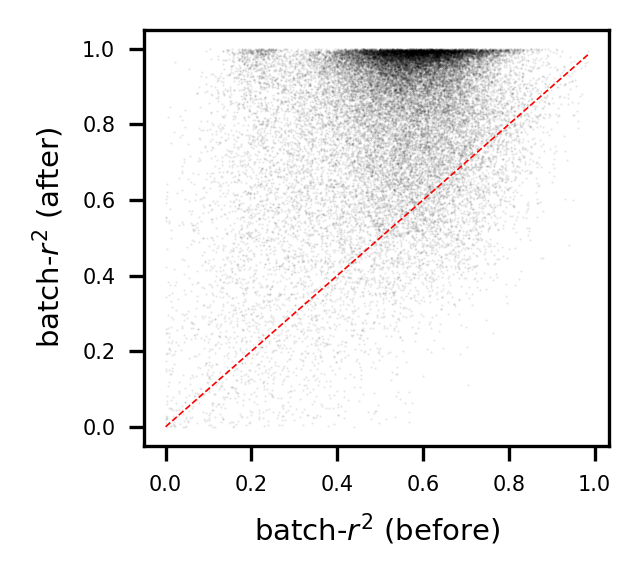

In [109]:
def test():
    ntr = len(ki_tr)
    
    nscan, nconst, ndrop = 0, 0, 0
    R2 = np.full(ntr, np.nan)
    for tri, good in enumerate(trfilter):
        if not good: continue
        nscan += 1
        xs = trlens[tri]
        ys = trdsg[tri]
        if not np.any(np.isfinite(ys)):
            ndrop += 1
            continue
        m = np.isfinite(xs) & np.isfinite(ys)
        xs = xs[m]
        xs = np.clip(xs-20, 0, None)
        if not np.any(xs): 
            assert False
            continue
        if np.unique(xs).size == 1:
            nconst += 1
            continue
        ys = ys[m]
        R2[tri] = sm.OLS(np.insert(ys,0,0), sm.add_constant(np.insert(xs,0,0))).fit().rsquared
        
    n0 = np.sum(R2>0.8)
    n1 = nscan - nconst
    n2 = nscan
    print(f"{nscan} TRs scanned")
    print(f"{nconst} TRs not tested: no variation in length for this TR in HGSVC")
    print(f"{ndrop} TRs dropped")
    print(f"{n0:,}/{n1:,} ({n0/n1:.1%}) has r2 > 0.8")
    
    nscan, nconst, ndrop = 0, 0, 0
    R2a = np.full(ntr, np.nan)
    for tri, good in enumerate(trfilter):
        if not good: continue
        nscan += 1
        xs = trlens[tri]
        ys = trdsg[tri] / bias[:,tri]
        if not np.any(np.isfinite(ys)):
            ndrop += 1
            continue
        m = np.isfinite(xs) & np.isfinite(ys)
        xs = xs[m]
        xs = np.clip(xs-20, 0, None)
        if not np.any(xs): 
            assert False
            continue
        if np.unique(xs).size == 1:
            nconst += 1
            continue
        ys = ys[m]
        R2a[tri] = sm.OLS(np.insert(ys,0,0), sm.add_constant(np.insert(xs,0,0))).fit().rsquared
        
    n0 = np.sum(R2a>0.8)
    n1 = nscan - nconst
    n2 = nscan
    print()
    print(f"{nscan} TRs scanned")
    print(f"{nconst} TRs not tested: no variation in length for this TR in HGSVC")
    print(f"{ndrop} TRs dropped during bias correction")
    print(f"{n0:,}/{n1:,} ({n0/n1:.1%}) has r2 > 0.8")
    
    n0 = np.sum(np.isfinite(R2a))
    n1 = np.sum(trfilter)
    print()
    print(f"{n0:,}/{n1:,} ({n0/n1:.1%}) loci evaluated")
    print(f"{np.nanmean(R2):.3f} -> {np.nanmean(R2a):.3f}")
    
    xl = [np.nanmin(R2), np.nanmax(R2)]
    plt.figure(dpi=300, figsize=(2,1.8))
    plt.plot(R2, R2a, '.k', mew=0, markersize=1, alpha=0.1)
    plt.plot(xl, xl, '--r', lw=0.4)
    plt.xlabel("batch-$r^2$ (before)")
    plt.ylabel("batch-$r^2$ (after)")
    plt.show(); plt.close()
    
    return R2, R2a
R2_all_loci, R2a_all_loci = test()

In [110]:
np.savetxt("/project/mchaisso_100/cmb-17/vntr_genotyping/rpgg2_k21_84k/hgsvc/clinic/bias/invariant_kmer/output2/R2_all_loci.R2a_all_loci.txt", np.hstack((R2_all_loci[:,None], R2a_all_loci[:,None])), delimiter="\t", fmt="%s")